## Required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import datetime
import cv2

## Image Data Collection

In [14]:
vid = cv2.VideoCapture(0)
c=0
while True:
    bool,img=vid.read()
    
    #print(img.shape)
    cv2.rectangle(img,(260,150),(450,350),(0,0,255),1)
    crop_img = img[150:350,260:450]
    
    #cv2.imshow("capture",img)
    cv2.imshow("show",img)
    cv2.imwrite(r"D:\ML Files\sai_room\aditya\aditya{}.jpg".format(c),crop_img)
    c+=1
    if cv2.waitKey(15)& 255 == ord('q'):
        break
    if c==200:
        break
cv2.destroyAllWindows()
    

## Reading Data from localhost

In [15]:
features = []
class_label = []
for files in os.listdir(r"D:\ML Files\sai_room"):
    
    for img in os.listdir(r"D:\ML Files\sai_room\{}".format(files)):
        images=cv2.imread(r"D:\ML Files\sai_room\{}\{}".format(files,img))
        features.append(cv2.resize(images,(100,100)).flatten())
        class_label.append(files)

In [16]:
len(features)

600

In [17]:
data = np.array(features)

In [18]:
a1 = pd.DataFrame(data)

## Converting Class labels to Binary Format

In [19]:
from sklearn.preprocessing import LabelEncoder


# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(class_label)


# To see the mapping:
print("Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Mapping: {'aditya': 0, 'nikhil': 1, 'sai': 2}


## Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(features,numerical_labels,test_size=0.15,stratify = numerical_labels)

In [22]:
xf_train,x_cv,yf_train,y_cv = train_test_split(x_train,y_train,test_size=0.15,stratify = y_train)

## Scaling Techinque

In [49]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [50]:
std = MinMaxScaler()

n_xf_train = std.fit_transform(xf_train)

n_xf_test = std.transform(x_test)

n_xf_cv = std.transform(x_cv)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

### without normalization

In [35]:
knn = KNeighborsClassifier(n_neighbors=21)
model = knn.fit(xf_train,yf_train)

### with normalization

In [52]:
knn = KNeighborsClassifier(n_neighbors=59)
model = knn.fit(n_xf_train,yf_train)

## Prediction on Cross-Validation data

In [36]:
predicted_cv = model.predict(x_cv)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_cv,predicted_cv)*100

100.0

## Prediction on Unseen Data

In [39]:
predicted_test = model.predict(x_test)

In [40]:
accuracy_score(y_test,predicted_test)*100

100.0

In [30]:
len(xf_train)

433

## Plot Between Training and CV Error

In [33]:
tr_err = []
cv_err = []
for k in range(1,433,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    model = knn.fit(xf_train,yf_train)


    # Training error
    predicted_cl = model.predict(xf_train)
    tr_err.append(1-accuracy_score(yf_train,predicted_cl))

    # Cv_error
    predicted_cl = model.predict(x_cv)
    cv_err.append(1-accuracy_score(y_cv,predicted_cl))
    

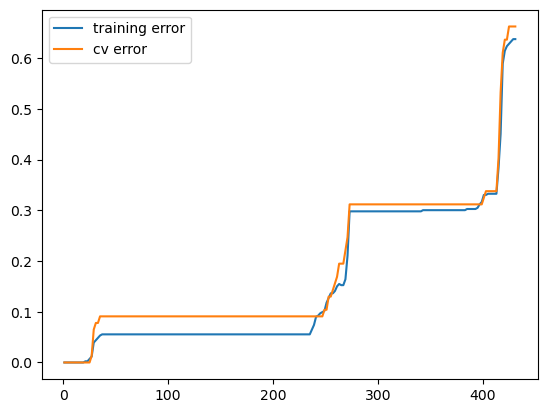

In [34]:
plt.plot(range(1,433,2),tr_err,label="training error")
plt.plot(range(1,433,2),cv_err,label="cv error")
plt.legend()
plt.show()

## Live Time 

In [41]:
from datetime import datetime

## Face Detection Model

In [45]:
vid = cv2.VideoCapture(0)
while True:
    bool,img=vid.read()
    now = datetime.now()
    
    #print(img.shape)
    cv2.rectangle(img,(260,150),(450,350),(0,0,255),1)
    crop_img = img[150:350,260:450]


    xq = cv2.resize(crop_img,(100,100)).flatten()
    xq = xq.reshape((1,30000))
    y_i = model.predict(xq)
    cv2.putText(img,now.strftime("%H:%M:%S"),(14,30),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),5)
    cv2.putText(img,"Face Detection",(14,90),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),5)

    if y_i[0]==0:
        cv2.putText(img,"aditya",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
    
        cv2.imshow("capture",img)
    elif y_i[0]==1:
        cv2.putText(img,"nikhil",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
        cv2.imshow("capture",img)
    elif y_i[0]==2:
        cv2.putText(img,"sai",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
        cv2.imshow("capture",img)
    """elif y_i[0]==3:
        cv2.putText(img,"sai",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
        cv2.imshow("capture",img)
    elif y_i[0]==4:
        cv2.putText(img,"varun",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
        cv2.imshow("capture",img)
    elif y_i[0]==5:
        cv2.putText(img,"yaswanth",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
        cv2.imshow("capture",img)"""
    
    if cv2.waitKey(1)& 255 == ord('q'):
        break
cv2.destroyAllWindows()
    

vid = cv2.VideoCapture(0)
bol,img = vid.read()
cv2.imshow("sap",img)
cv2.waitKey()
cv2.destroyAllWindows()